# 5) Value Clusters — Identifying the Best Specs per Rupee

This analysis quantifies overall smartphone value by combining key specifications into a single composite score and comparing it against price.  
The objective is to reveal which models and brands deliver the highest technical capability for every ₹100,000 spent, and to visualize clusters of "value" vs "premium" positioning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

DATA_PATH = "data/processed/all_brands_20k.csv"
FIG_DIR = "analysis/figures"
os.makedirs(FIG_DIR, exist_ok=True)

df = pd.read_csv(DATA_PATH)
df = df.dropna(subset=["price", "ram_gb", "storage_gb", "display_inch", "battery_mah", "camera_mp"])
df.head(3)

,name,price,specs,ram_gb,storage_gb,display_inch,battery_mah,camera_mp,brand
0,REDMI Note 13 Pro 5G,20000.0,"['8 GB RAM | 128 GB ROM', '16.94 cm (6.67 inch...",8.0,128.0,6.67,5100.0,200,Xiaomi
1,Samsung Galaxy A13,20000.0,['6 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,6.0,128.0,6.60,5000.0,50,Samsung
2,POCO F1,20000.0,"['6 GB RAM | 128 GB ROM', '15.7 cm (6.18 inch)...",6.0,128.0,6.18,4000.0,12,OnePlus


---
## Composite Scoring Methodology

To evaluate overall smartphone value, a **composite specification score** is constructed to represent a device’s total hardware capability.  
Each key specification contributes to this score based on its relative importance to overall performance and user experience.

### Formula

$$
\text{Composite Score} =
(3 \times \text{RAM}_{GB}) +
\left(\frac{\text{Storage}_{GB}}{64}\right) +
\left(\frac{\text{Battery}_{mAh}}{1500}\right) +
\left(\frac{\text{Camera}_{MP}}{12}\right) +
(0.5 \times \text{Display Size}_{inches})
$$

The weights were assigned based on practical performance relevance:
- **RAM (×3):** Primary indicator of multitasking and smoothness.  
- **Storage (÷64):** Reflects capacity tiering, with diminishing returns beyond 256GB.  
- **Battery (÷1500):** Normalized to typical 4,500–6,000mAh smartphone ranges.  
- **Camera (÷12):** Adjusted for diminishing returns in megapixel scaling.  
- **Display (×0.5):** Minor influence; screen size variation offers marginal value beyond 6.5".

### Value-per-Rupee Metric

To translate the composite capability into a price-relative measure, the score is normalized by cost:

$$
\text{Value per ₹100,000} = 
\frac{\text{Composite Score}}{\text{Price}} \times 100,000
$$

This expresses how much technical capability a consumer receives per ₹100,000 spent.  
Higher values indicate **stronger specifications for the given price**, enabling brand and model-level comparison of true hardware value.

In [2]:
df["composite_score"] = (
    (3 * df["ram_gb"]) +
    (df["storage_gb"] / 64) +
    (df["battery_mah"] / 1500) +
    (df["camera_mp"] / 12) +
    (df["display_inch"] * 0.5)
)

# Normalize to per ₹100k
df["value_per_100k"] = df["composite_score"] / df["price"] * 100000

df[["brand", "name", "price", "composite_score", "value_per_100k"]].head()

,brand,name,price,composite_score,value_per_100k
0,Xiaomi,REDMI Note 13 Pro 5G,20000.0,49.401667,247.008333
1,Samsung,Samsung Galaxy A13,20000.0,30.800000,154.000000
2,OnePlus,POCO F1,20000.0,26.756667,133.783333
3,Pixel,REDMI 9 Power,20000.0,31.265000,156.325000
4,OnePlus,REDMI Note-14 Pro 5G,20027.0,37.168333,185.591119


---
## Top-10 Value Smartphones

The following table lists the top ten models delivering the highest specification value per ₹100,000 spent.

In [4]:
top_10_value = df.sort_values("value_per_100k", ascending=False).head(10)
top_10_value[["brand", "name", "price", "value_per_100k"]]

,brand,name,price,value_per_100k
51,Xiaomi,REDMI Note 13 Pro 5G,20870.0,303.793324
160,Xiaomi,REDMI Note 13 Pro+ 5G,22405.0,282.682437
169,Xiaomi,REDMI Note 12 Pro+ 5G,22704.0,278.900928
297,Xiaomi,REDMI Note 13 Pro+ 5G,25947.0,259.509770
17,Xiaomi,REDMI Note 13 Pro+ 5G,20385.0,251.827324
34,Xiaomi,REDMI Note 13 Pro 5G,20665.0,248.737801
0,Xiaomi,REDMI Note 13 Pro 5G,20000.0,247.008333
80,Realme,realme 13 5G,20999.0,242.202010
71,Realme,realme P1 Speed 5G,20999.0,242.082956
121,Xiaomi,REDMI Note 12 Pro 5G,21499.0,236.452858


---
## Value Clusters by Price and Composite Score

This scatter plot visualizes the relationship between composite technical capability and price.  
Phones above the general trendline offer higher value-for-money, while those below tend to rely on brand premium or design appeal.

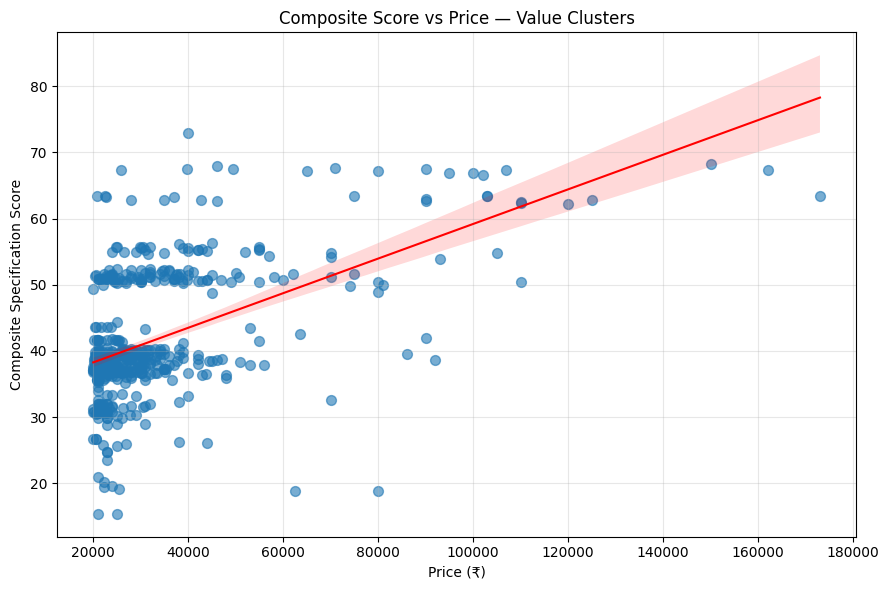

Saved: analysis/figures\value_clusters.png


In [5]:
plt.figure(figsize=(9,6))
sns.regplot(
    data=df,
    x="price",
    y="composite_score",
    scatter_kws={"alpha": 0.6, "s": 50},
    line_kws={"color": "red", "lw": 1.5}
)
plt.title("Composite Score vs Price — Value Clusters")
plt.xlabel("Price (₹)")
plt.ylabel("Composite Specification Score")
plt.grid(alpha=0.3)
plt.tight_layout()

fig_path_cluster = os.path.join(FIG_DIR, "value_clusters.png")
plt.savefig(fig_path_cluster, dpi=200, bbox_inches="tight")
plt.show()

print(f"Saved: {fig_path_cluster}")

---
## Average Value Score by Brand

This bar chart compares brands based on their average specification value per ₹100,000.  
Higher bars indicate better overall return on specifications for the price paid.

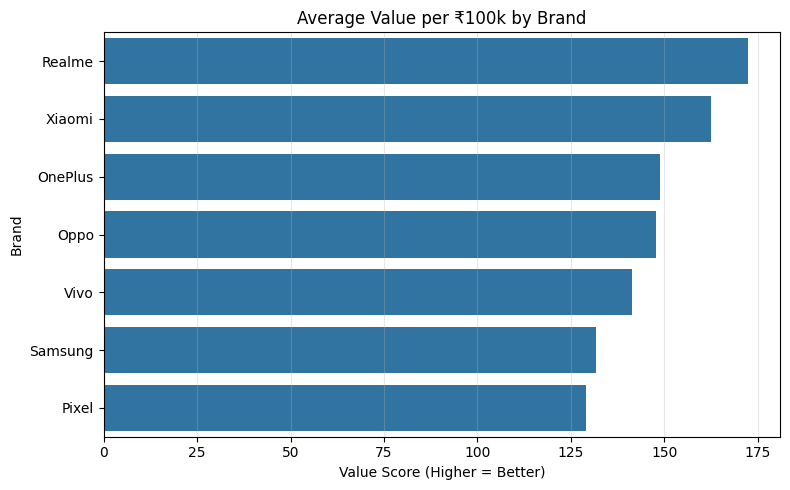

Saved: analysis/figures\brand_value_per_100k.png


In [6]:
brand_value = df.groupby("brand")["value_per_100k"].mean().sort_values(ascending=False).round(2)

plt.figure(figsize=(8,5))
sns.barplot(x=brand_value.values, y=brand_value.index, color="#1f77b4")
plt.title("Average Value per ₹100k by Brand")
plt.xlabel("Value Score (Higher = Better)")
plt.ylabel("Brand")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()

fig_path_value = os.path.join(FIG_DIR, "brand_value_per_100k.png")
plt.savefig(fig_path_value, dpi=200, bbox_inches="tight")
plt.show()

print(f"Saved: {fig_path_value}")

In [7]:
brand_value = df.groupby("brand")["value_per_100k"].mean().sort_values(ascending=False).round(2)
brand_value


brand
Realme     172.35
Xiaomi     162.45
OnePlus    148.99
Oppo       147.88
Vivo       141.28
Samsung    131.68
Pixel      129.10
Name: value_per_100k, dtype: float64

---
# Summary & Insights — Value Clusters: Best Specs per Rupee

### Overview
This analysis evaluates the relationship between smartphone price and overall hardware capability, using a weighted composite scoring formula to calculate a **Value per ₹100,000** metric.  
This metric represents how much combined technical performance a consumer receives for every ₹100,000 spent.  
Higher values indicate stronger hardware configurations relative to price, revealing true "spec-for-rupee" efficiency.

### Key Observations
- **Realme** and **Xiaomi** dominate the value leaderboard, with average value scores of **172.35** and **162.45**, respectively.  
  These brands consistently deliver aggressive hardware configurations at lower prices, positioning themselves as the most cost-efficient players in the market.
- **OnePlus** and **Oppo** follow with moderate value efficiency, hovering around the 145–150 range — balancing premium features with affordability.
- **Vivo** performs respectably but below its BBK siblings, likely due to its focus on design and camera software optimization rather than raw specifications.
- **Samsung** and **Pixel** show the lowest value-per-rupee scores (131.7 and 129.1), confirming that these brands command a **brand and experience premium** rather than competing on raw hardware.

### Top-10 Value Smartphones
The highest-scoring models overwhelmingly belong to **Xiaomi** and **Realme**, with Xiaomi’s *Redmi Note 13 Pro* and *13 Pro+* series dominating the leaderboard.  
All of the top ten models are priced within the **₹20,000–₹26,000** range — indicating the market’s sweet spot for maximum spec-per-rupee efficiency.

| Rank | Brand | Model | Price (₹) | Value/₹100k |
|------|--------|--------|------------|--------------|
| 1 | Xiaomi | REDMI Note 13 Pro 5G | 20,870 | 303.8 |
| 2 | Xiaomi | REDMI Note 13 Pro+ 5G | 22,405 | 282.7 |
| 3 | Xiaomi | REDMI Note 12 Pro+ 5G | 22,704 | 278.9 |
| 4 | Xiaomi | REDMI Note 13 Pro+ 5G | 25,947 | 259.5 |
| 5 | Xiaomi | REDMI Note 13 Pro+ 5G | 20,385 | 251.8 |
| 6 | Xiaomi | REDMI Note 13 Pro 5G | 20,665 | 248.7 |
| 7 | Xiaomi | REDMI Note 13 Pro 5G | 20,000 | 247.0 |
| 8 | Realme | realme 13 5G | 20,999 | 242.2 |
| 9 | Realme | realme P1 Speed 5G | 20,999 | 242.1 |
| 10 | Xiaomi | REDMI Note 12 Pro 5G | 21,499 | 236.5 |

### Interpretation
- The **₹20–25k range** emerges as the **"value epicenter"** of the 5G smartphone market.  
  Nearly all top performers cluster in this zone, offering flagship-tier specs (8GB+ RAM, 256GB storage, 5000mAh+ batteries) at budget-friendly prices.
- **Xiaomi’s Note series** leads not just in price aggressiveness but in overall spec balance — large batteries, strong cameras, and high memory configurations at minimal cost.
- **Realme’s 13-series** and **P1-series** also showcase excellent efficiency, confirming its strategy of targeting “spec-for-buck” buyers rather than prestige-oriented ones.
- **Premium brands (Samsung, Pixel)** position themselves intentionally outside the value curve — focusing on experience, design, and software optimization rather than raw component density.

### Implications
- **For Consumers:** The ₹20–25k price range offers the strongest hardware returns; going above ₹40k yields diminishing spec gains for the added cost.
- **For Analysts:** Value-per-rupee scoring quantifies how efficiently each brand converts cost into technical performance — useful for modeling pricing competitiveness.
- **For Brands:** Xiaomi and Realme’s sustained high scores show that **value leadership is a measurable, defensible advantage** in India’s price-sensitive market, while OnePlus and Samsung must justify their premiums via ecosystem and brand trust.

---